In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_cust = pd.read_csv("C:/Users/moort/Downloads/Customers.csv", encoding='latin-1')
data_cust.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [3]:
data_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [4]:
data_cust.describe(include='object')

,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
count,15266,15266,15266,15256,15266,15266,15266,15266,15266
unique,2,15118,8258,467,512,9505,8,3,11270
top,Male,John Smith,Toronto,CA,California,90017,United States,North America,6/12/1989
freq,7748,4,204,740,715,70,6828,8381,5


In [5]:
data_cust.shape

(15266, 10)

In [6]:
data_cust[data_cust['State'] == 'Napoli']

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NaN,Napoli,80035,Italy,Europe,4/18/1981
5316,732289,Male,Indro Piccio,Varcaturo,NaN,Napoli,80014,Italy,Europe,2/24/1949
5372,742042,Male,Amaranto Loggia,Casaferro,NaN,Napoli,80034,Italy,Europe,3/14/1936
5377,742886,Female,Edmonda Capon,Terzigno,NaN,Napoli,80040,Italy,Europe,8/6/1963
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NaN,Napoli,80038,Italy,Europe,1/5/1961
5485,759705,Male,Callisto Lo Duca,Casilli,NaN,Napoli,80047,Italy,Europe,8/28/1976
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NaN,Napoli,80045,Italy,Europe,11/13/1947
5531,766410,Male,Adelmio Beneventi,Licola,NaN,Napoli,80078,Italy,Europe,1/13/1940
5631,781667,Female,Ilda Manna,Napoli,NaN,Napoli,80134,Italy,Europe,5/8/1977
5695,789177,Male,Calogero Folliero,Mariglianella,NaN,Napoli,80030,Italy,Europe,3/3/2000


In [7]:
data_cust['State Code'].fillna('NA', inplace=True)

C:\Users\moort\AppData\Local\Temp\ipykernel_10624\3573115836.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cust['State Code'].fillna('NA', inplace=True)


In [8]:
data_cust.isnull().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64

In [9]:
data_cust['Birthday']=pd.to_datetime(data_cust['Birthday'], format='%m/%d/%Y')

In [10]:
def calculate_age(dob):
    today = pd.Timestamp.today()
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age

In [11]:
data_cust['Age'] = data_cust['Birthday'].apply(calculate_age)

In [12]:
data_cust.head(20)

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Age
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,85
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,45
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26,77
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17,67
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19,59
5,1086,Male,Hayden Clegg,TEMPLERS,SA,South Australia,5371,Australia,Australia,1954-01-20,70
6,1133,Male,Nicholas Caffyn,JUBILEE POCKET,QLD,Queensland,4802,Australia,Australia,1969-11-22,55
7,1256,Male,Lincoln Jenks,KULLOGUM,QLD,Queensland,4660,Australia,Australia,1950-03-12,74
8,1314,Male,Isaac Israel,EDITH RIVER,NT,Northern Territory,852,Australia,Australia,1965-12-21,58
9,1568,Male,Luke Virtue,KOTTA,VIC,Victoria,3565,Australia,Australia,1975-07-25,49


### Visualiztion of Customers


array([[<Axes: title={'center': 'CustomerKey'}>,
        <Axes: title={'center': 'Birthday'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

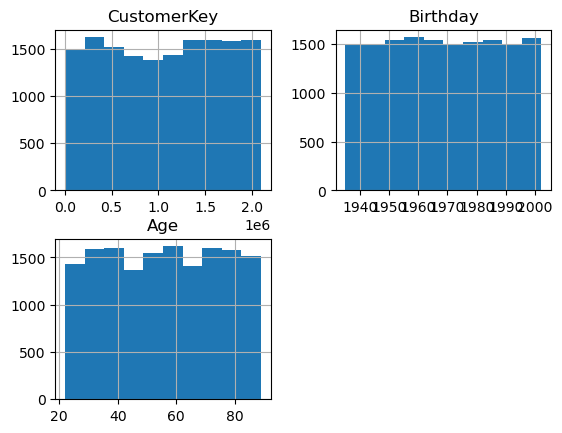

In [93]:
data_cust.hist()

In [14]:
data_cust.groupby('Gender').size()

Gender
Female    7518
Male      7748
dtype: int64

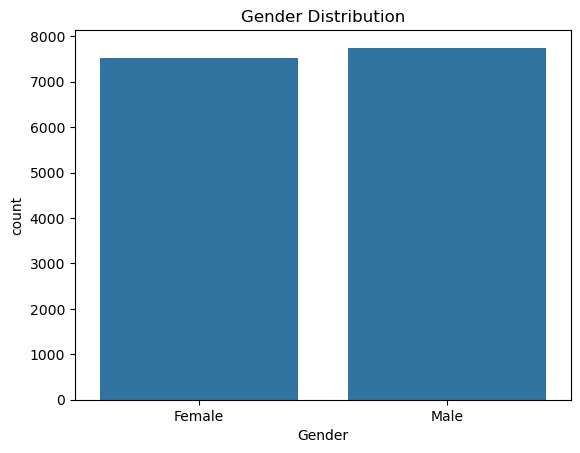

In [15]:
# Gender Distribution

sns.countplot(x='Gender', data=data_cust)
plt.title('Gender Distribution')
plt.show()


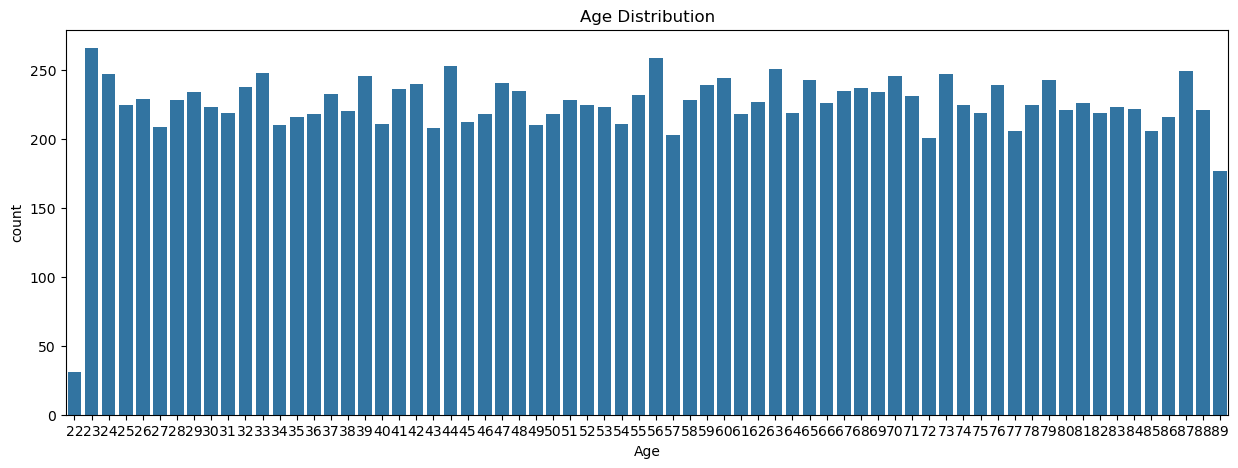

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x='Age', data=data_cust)
plt.title('Age Distribution')
plt.show()

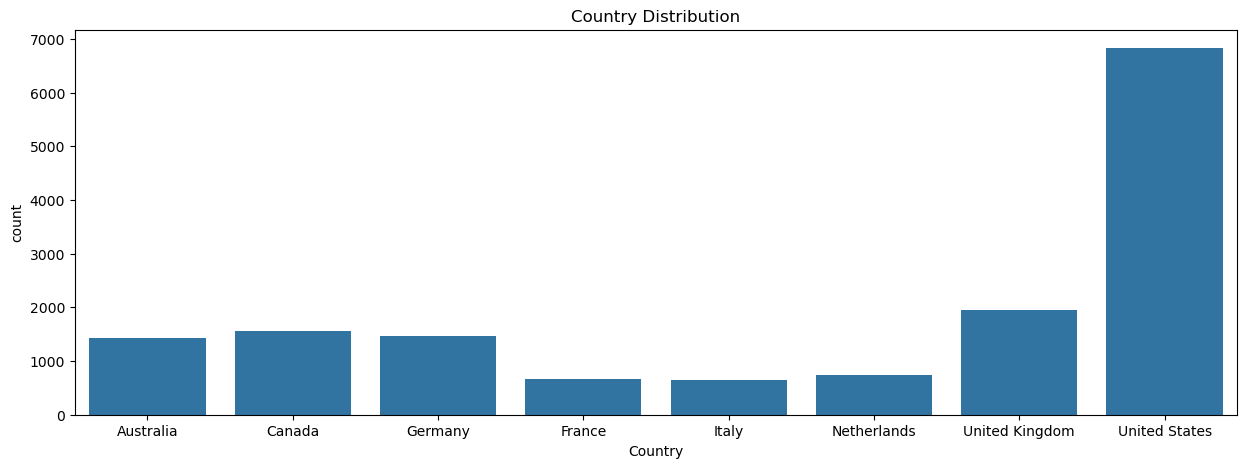

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(x='Country', data=data_cust)
plt.title('Country Distribution')
plt.show()

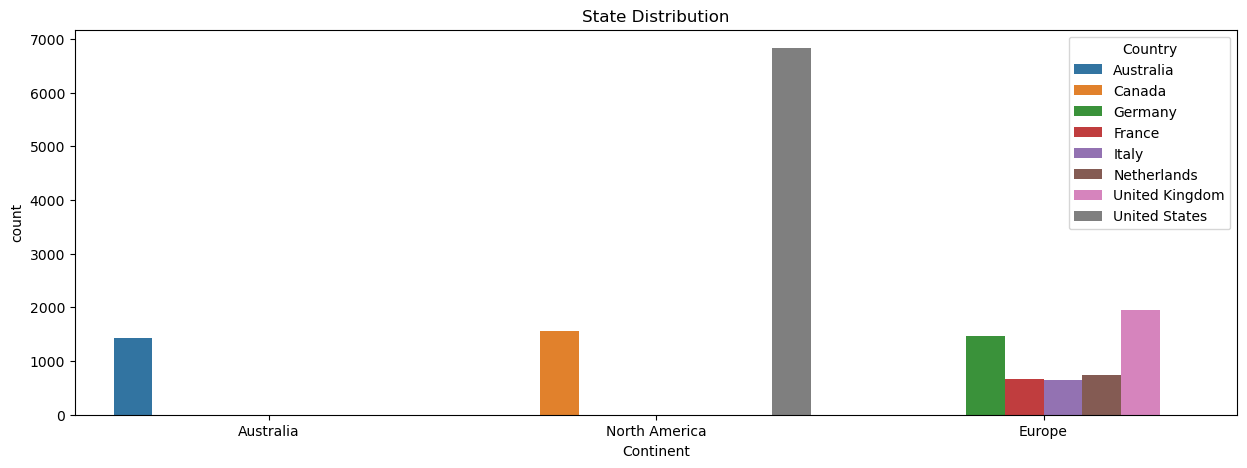

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(x='Continent', hue='Country', data=data_cust)
plt.title('State Distribution')
plt.show()

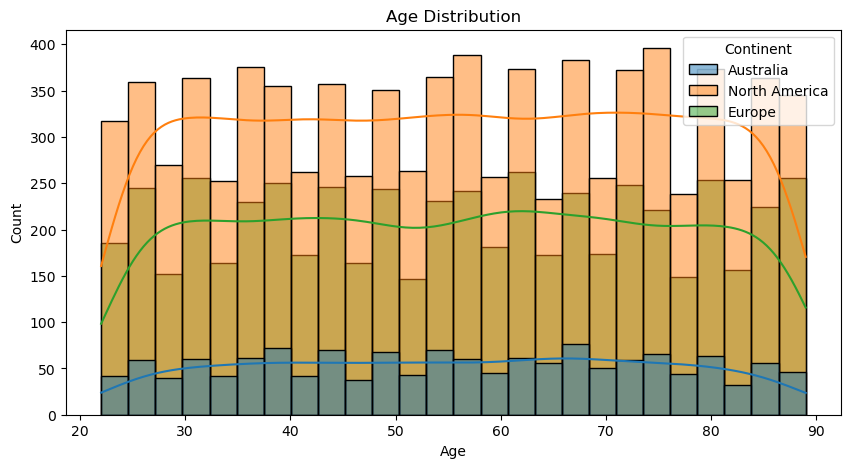

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(x='Age', hue='Continent', data=data_cust, kde=True)
plt.title('Age Distribution')
plt.show()

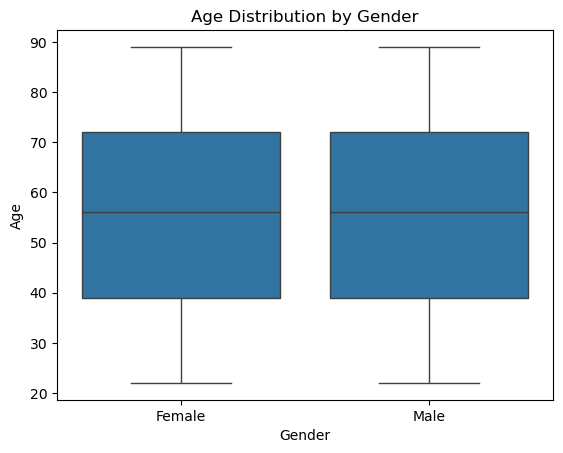

In [20]:
sns.boxplot(x='Gender', y='Age', data=data_cust)
plt.title('Age Distribution by Gender')
plt.show()

In [21]:
data_sale = pd.read_csv("Sales.csv")

In [22]:
data_sale.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [23]:
data_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [24]:
data_sale.shape

(62884, 9)

In [25]:
data_sale.describe()

,Order Number,Line Item,CustomerKey,StoreKey,ProductKey,Quantity
count,6.288400e+04,62884.000000,6.288400e+04,62884.000000,62884.000000,62884.000000
mean,1.430905e+06,2.164207,1.180797e+06,31.802144,1125.859344,3.144790
std,4.532963e+05,1.365170,5.859634e+05,22.978188,709.244010,2.256371
min,3.660000e+05,1.000000,3.010000e+02,0.000000,1.000000,1.000000
25%,1.121017e+06,1.000000,6.808580e+05,8.000000,437.000000,1.000000
50%,1.498016e+06,2.000000,1.261200e+06,37.000000,1358.000000,2.000000
75%,1.788010e+06,3.000000,1.686496e+06,53.000000,1650.000000,4.000000
max,2.243032e+06,7.000000,2.099937e+06,66.000000,2517.000000,10.000000


In [26]:
data_sale.describe(include = 'object')

,Order Date,Delivery Date,Currency Code
count,62884,13165,62884
unique,1641,1492,5
top,12/21/2019,1/6/2020,USD
freq,222,50,33767


In [27]:
data_sale.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [28]:
data_sale['Order Date'] = pd.to_datetime(data_sale['Order Date'])

In [29]:
data_sale['Month'] = data_sale['Order Date'].dt.to_period('M')
data_sale['Year'] = data_sale['Order Date'].dt.to_period('Y')

In [30]:
data_sale['Month'] 

0        2016-01
1        2016-01
2        2016-01
3        2016-01
4        2016-01
          ...   
62879    2021-02
62880    2021-02
62881    2021-02
62882    2021-02
62883    2021-02
Name: Month, Length: 62884, dtype: period[M]

array([[<Axes: title={'center': 'Order Number'}>,
        <Axes: title={'center': 'Line Item'}>,
        <Axes: title={'center': 'Order Date'}>],
       [<Axes: title={'center': 'CustomerKey'}>,
        <Axes: title={'center': 'StoreKey'}>,
        <Axes: title={'center': 'ProductKey'}>],
       [<Axes: title={'center': 'Quantity'}>, <Axes: >, <Axes: >]],
      dtype=object)

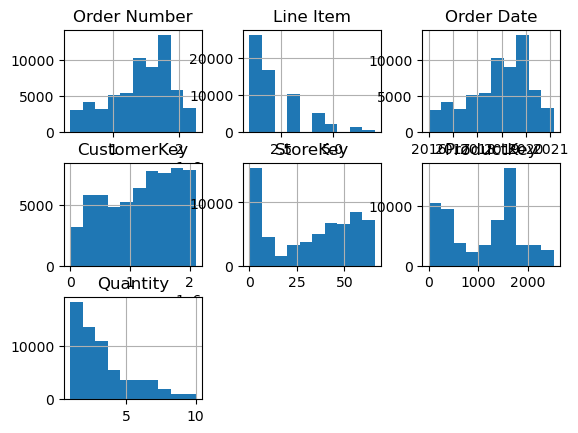

In [97]:
data_sale.hist()

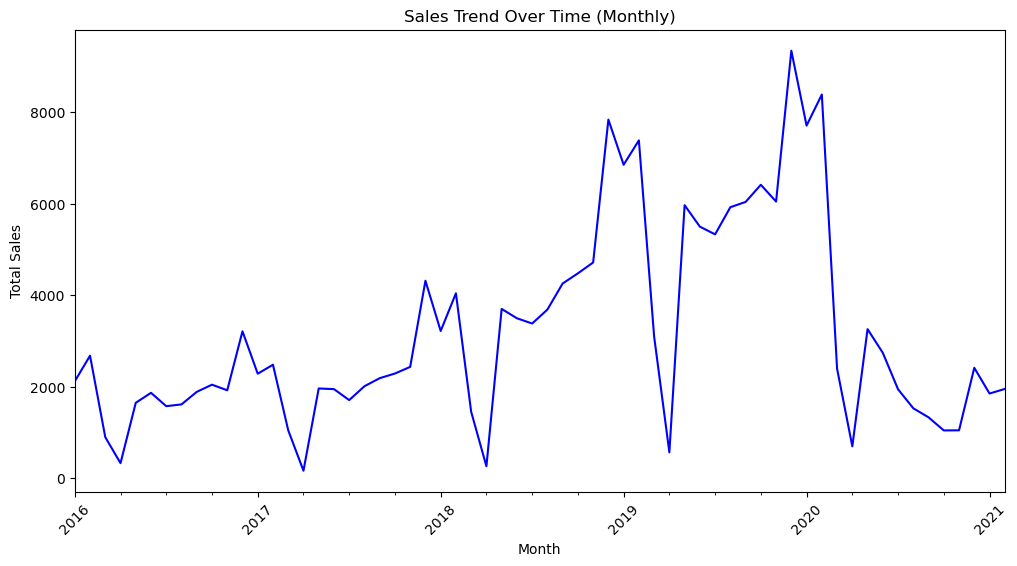

In [31]:
month_sales = data_sale.groupby('Month')['Quantity'].sum()

plt.figure(figsize=(12, 6))
month_sales.plot(kind='line', color='blue')
plt.title('Sales Trend Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

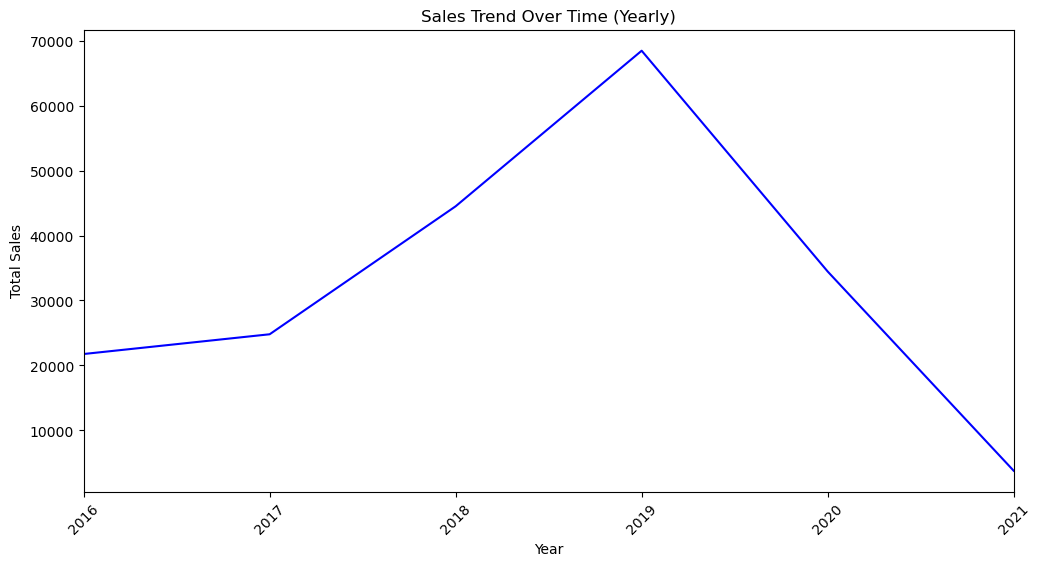

In [32]:
year_sales = data_sale.groupby('Year')['Quantity'].sum()
plt.figure(figsize=(12, 6))
year_sales.plot(kind='line', color='blue')
plt.title('Sales Trend Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

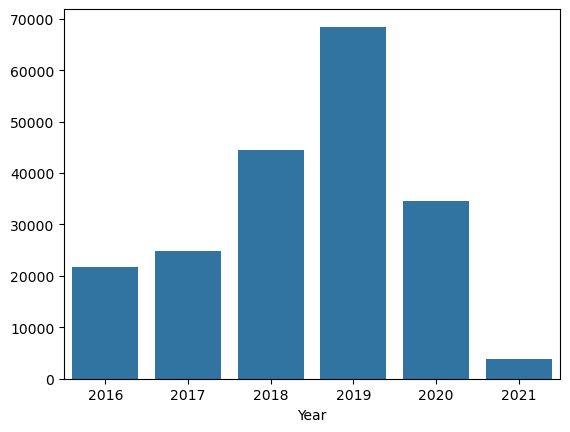

In [33]:
sns.barplot(x=year_sales.index, y=year_sales.values)
plt.show()

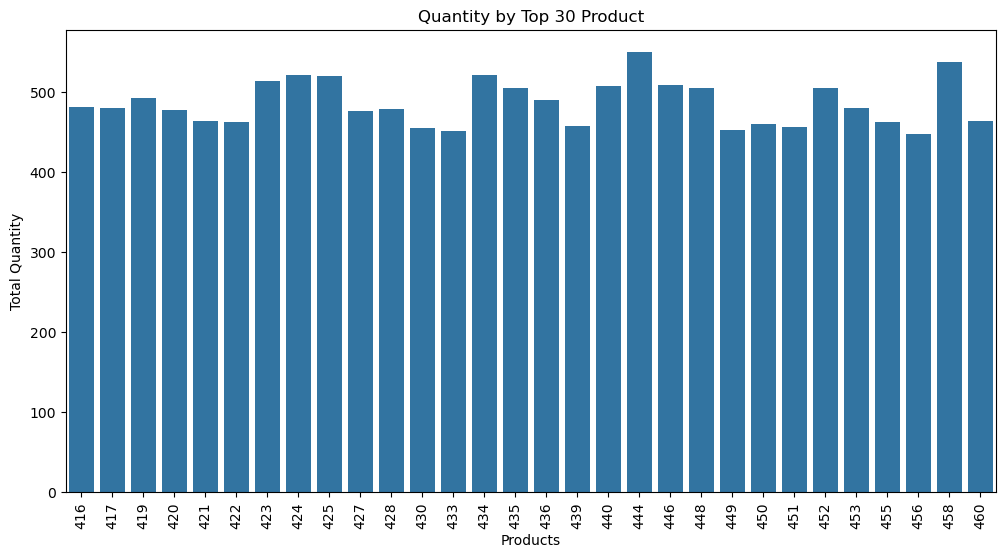

In [34]:
sales_by_product = data_sale.groupby('ProductKey')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_product.index[:30], y=sales_by_product.values[:30])
plt.title('Quantity by Top 30 Product')
plt.xlabel('Products')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)
plt.show()

In [35]:
data_store = pd.read_csv("Stores.csv")

In [36]:
data_store.head()

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015


In [37]:
data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [38]:
data_store.describe()

,StoreKey,Square Meters
count,67.000000,66.000000
mean,33.000000,1402.196970
std,19.485037,576.404058
min,0.000000,245.000000
25%,16.500000,1108.750000
50%,33.000000,1347.500000
75%,49.500000,2000.000000
max,66.000000,2105.000000


In [39]:
data_store.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [40]:
data_store['Square Meters'].fillna(0, inplace=True)

C:\Users\moort\AppData\Local\Temp\ipykernel_10624\1981071530.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_store['Square Meters'].fillna(0, inplace=True)


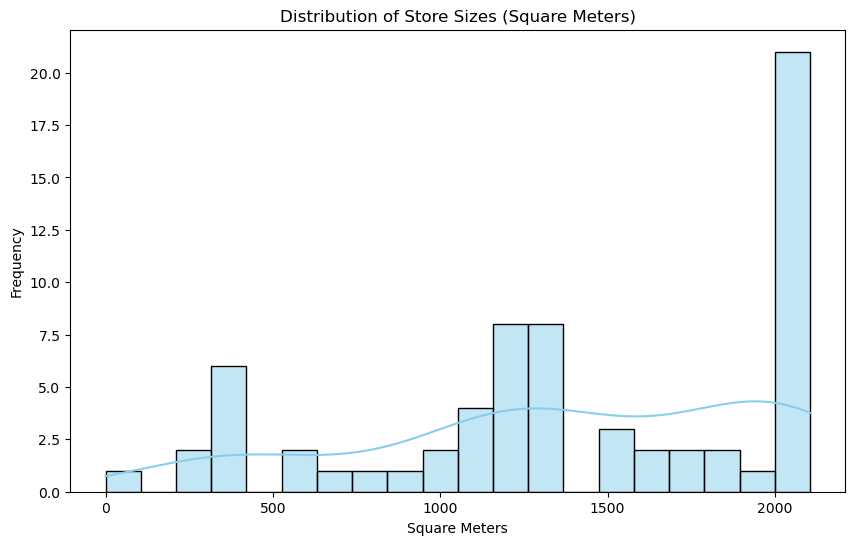

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data_store['Square Meters'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Store Sizes (Square Meters)')
plt.xlabel('Square Meters')
plt.ylabel('Frequency')
plt.show()

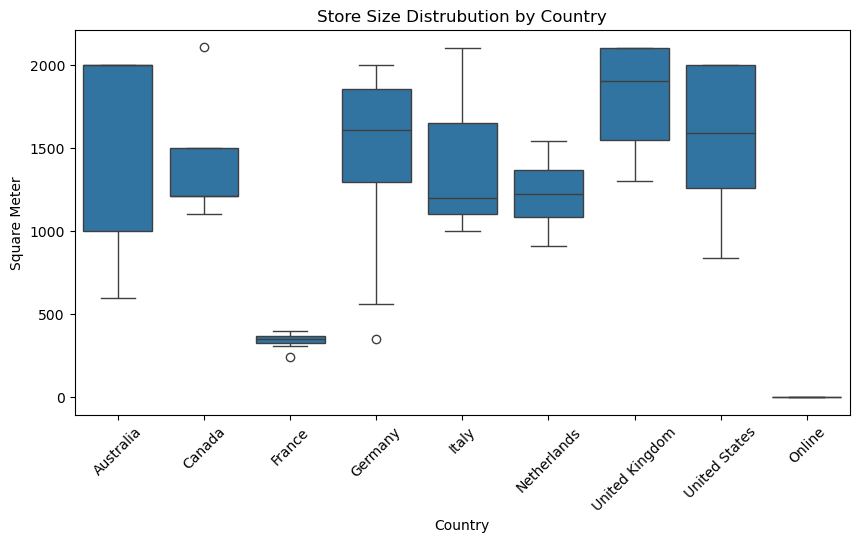

In [42]:
plt.figure(figsize= (10,5))
sns.boxplot(x = 'Country', y = 'Square Meters', data = data_store)
plt.title("Store Size Distrubution by Country")
plt.xlabel("Country")
plt.ylabel("Square Meter")
plt.xticks(rotation = 45)
plt.show()

<Axes: xlabel='Square Meters'>

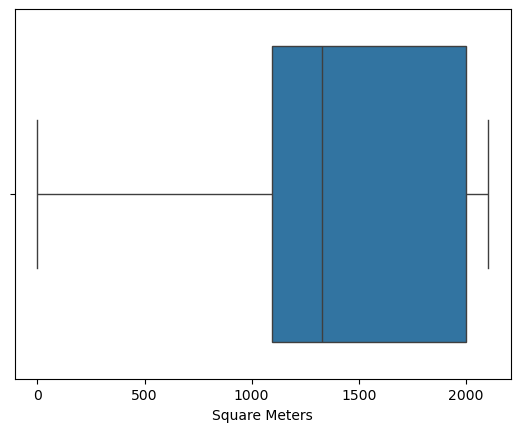

In [43]:
sns.boxplot(x = data_store['Square Meters'])

In [44]:
data_store['Open Date'] = pd.to_datetime(data_store['Open Date'],  format='%m/%d/%Y')
data_store['Open Year'] = data_store['Open Date'].dt.year
data_store['Open Year'] 

0     2008
1     2008
2     2012
3     2010
4     2015
      ... 
62    2008
63    2010
64    2012
65    2014
66    2010
Name: Open Year, Length: 67, dtype: int32

<Axes: xlabel='Open Year', ylabel='StoreKey'>

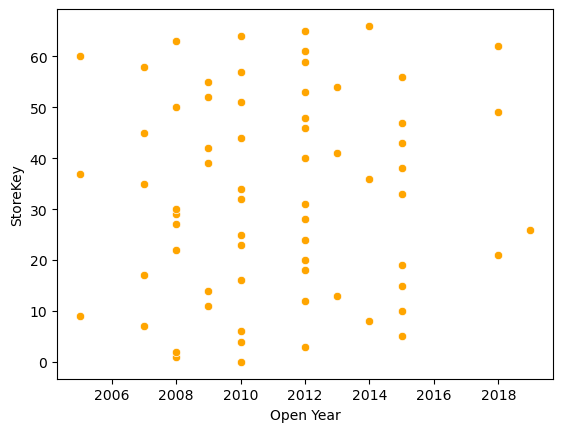

In [45]:
sns.scatterplot(x=data_store['Open Year'], y=data_store['StoreKey'], color='orange')